# Behavioral Predictions to Determine Customers Will Continue or Stop Service

# Project Domain

# Business Understanding
## Problem Statements
## Goals
## Solution Statements

# Data Understanding

# Library

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Path

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dsw2023-data/Telco_customer_churn_adapted_v2.xlsx


# Exploratory Data Analysis

## Gathering Data

In [3]:
# Save filepath ke dalam variabel
path = "/kaggle/input/dsw2023-data/Telco_customer_churn_adapted_v2.xlsx"
df = pd.read_excel(path,index_col=0)
df.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
Customer ID,,,,,,,,,,,,,,,
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [4]:
# Reset index 'Customer ID'
df = df.reset_index(drop=True)
df = pd.DataFrame(df)
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


The data used in this project contained `7034 rows` by `15 columns`

## Assessing Data

In [5]:
# Check ada yang kosong / tidak
df.isnull().sum()

Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

There is no missing values in this dataset

In [6]:
# Check data duplikasi
df.duplicated().sum()

0

There is no duplicated data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tenure Months                 7043 non-null   int64  
 1   Location                      7043 non-null   object 
 2   Device Class                  7043 non-null   object 
 3   Games Product                 7043 non-null   object 
 4   Music Product                 7043 non-null   object 
 5   Education Product             7043 non-null   object 
 6   Call Center                   7043 non-null   object 
 7   Video Product                 7043 non-null   object 
 8   Use MyApp                     7043 non-null   object 
 9   Payment Method                7043 non-null   object 
 10  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 11  Churn Label                   7043 non-null   object 
 12  Longitude                     7043 non-null   float64
 13  Lat

## Describing Data

In [8]:
df.describe()

,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,84.190200,107.043246,-6.404184,5720.384481
std,24.559481,39.117061,0.358316,0.322898,1537.974298
min,0.000000,23.725000,106.816666,-6.914744,2603.900000
25%,9.000000,46.150000,106.816666,-6.914744,4509.700000
50%,29.000000,91.455000,106.816666,-6.200000,5885.100000
75%,55.000000,116.805000,107.609810,-6.200000,6994.650000
max,72.000000,154.375000,107.609810,-6.200000,8450.000000


In [9]:
df.nunique()

Tenure Months                     73
Location                           2
Device Class                       3
Games Product                      3
Music Product                      3
Education Product                  3
Call Center                        2
Video Product                      3
Use MyApp                          3
Payment Method                     4
Monthly Purchase (Thou. IDR)    1585
Churn Label                        2
Longitude                          2
Latitude                           2
CLTV (Predicted Thou. IDR)      3438
dtype: int64

In [10]:
df.Location.value_counts()

Location
Jakarta    5031
Bandung    2012
Name: count, dtype: int64

In [11]:
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


In [12]:
# Split dataset
X = df.drop(columns=['Churn Label'])
y = df['Churn Label']

In [13]:
# One-hot encoding untuk kolom non-numeric di X
X_encoded = pd.get_dummies(X)
# Label encoding
y_encoded = y.map({'Yes': 1, 'No': 0})

In [14]:
# Gabungkan df
combined_df = pd.concat([X_encoded, y_encoded], axis=1)
combined_df

,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR),Location_Bandung,Location_Jakarta,Device Class_High End,Device Class_Low End,Device Class_Mid End,...,Video Product_No internet service,Video Product_Yes,Use MyApp_No,Use MyApp_No internet service,Use MyApp_Yes,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa,Churn Label
0,2,70.005,106.816666,-6.2,4210.7,False,True,False,False,True,...,False,False,True,False,False,False,False,True,False,1
1,2,91.910,106.816666,-6.2,3511.3,False,True,True,False,False,...,False,False,True,False,False,False,False,False,True,1
2,8,129.545,106.816666,-6.2,6983.6,False,True,True,False,False,...,False,True,False,False,True,False,False,False,True,1
3,28,136.240,106.816666,-6.2,6503.9,False,True,True,False,False,...,False,True,False,False,True,False,False,False,True,1
4,49,134.810,106.816666,-6.2,6942.0,False,True,True,False,False,...,False,True,False,False,True,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,27.495,106.816666,-6.2,6897.8,False,True,False,True,False,...,True,False,False,True,False,False,True,False,False,0
7039,24,110.240,106.816666,-6.2,2782.0,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,0
7040,72,134.160,106.816666,-6.2,7228.0,False,True,True,False,False,...,False,True,False,False,True,True,False,False,False,0
7041,11,38.480,106.816666,-6.2,3630.9,False,True,False,False,True,...,False,False,True,False,False,False,False,False,True,0


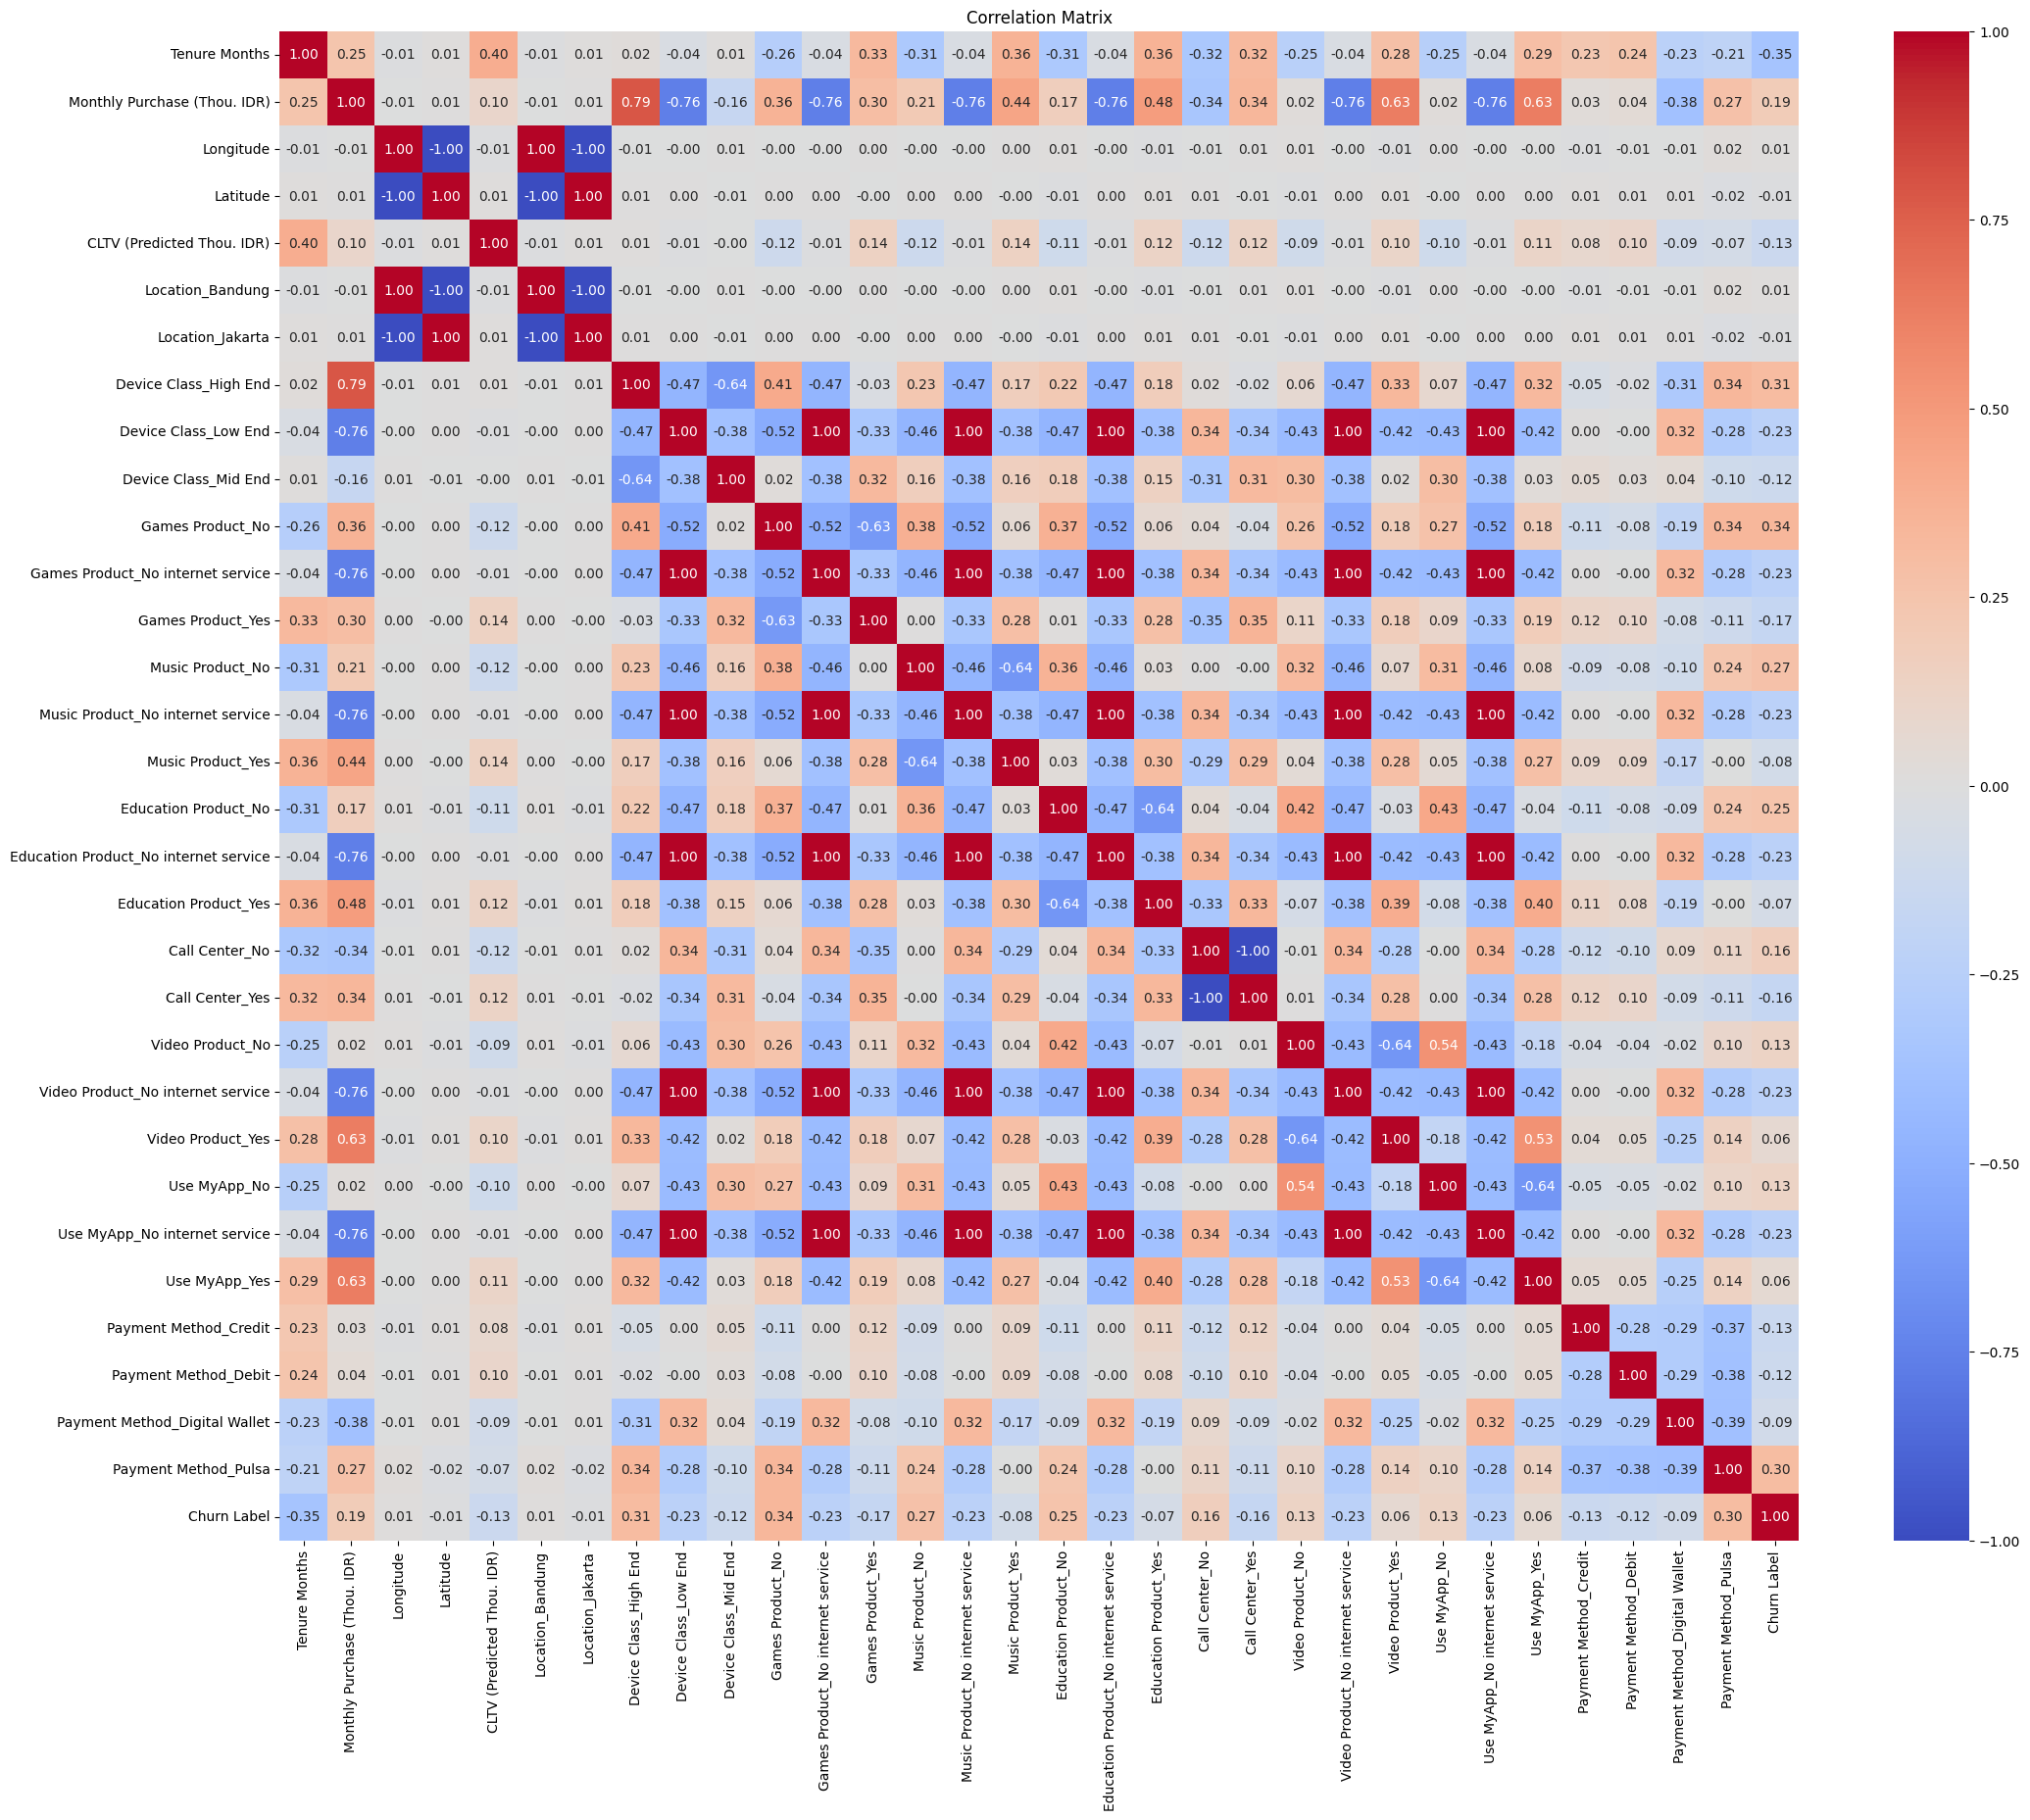

In [15]:
corr_matrix = combined_df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix it was found that the columns that had a **positive correlation** with the `Churn Label` column were sorted from strongest to weak as follows:
1. Games Product_No (0.34)
2. Device Class_High End (0.31)
3. Payment Method_Pulsa (0.30)
4. Music Product_No (0.27)
5. Education Product_No (0.25)

## Column Distribution

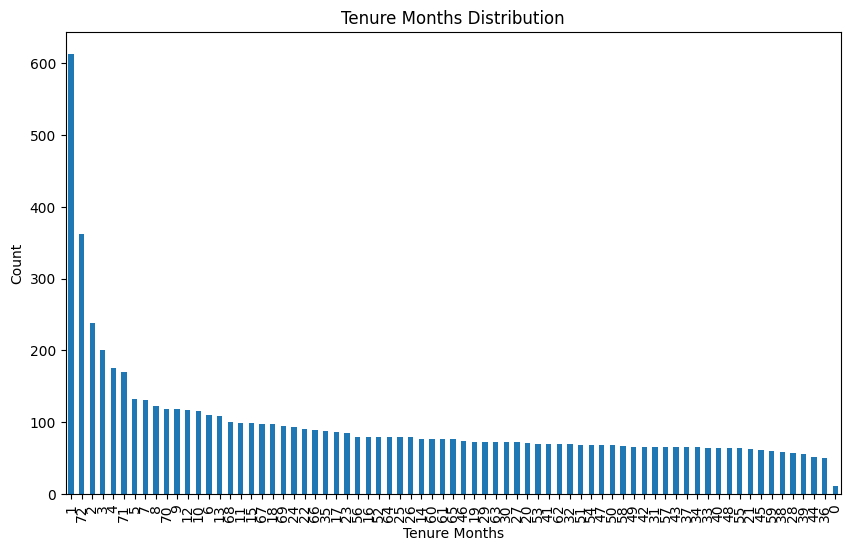

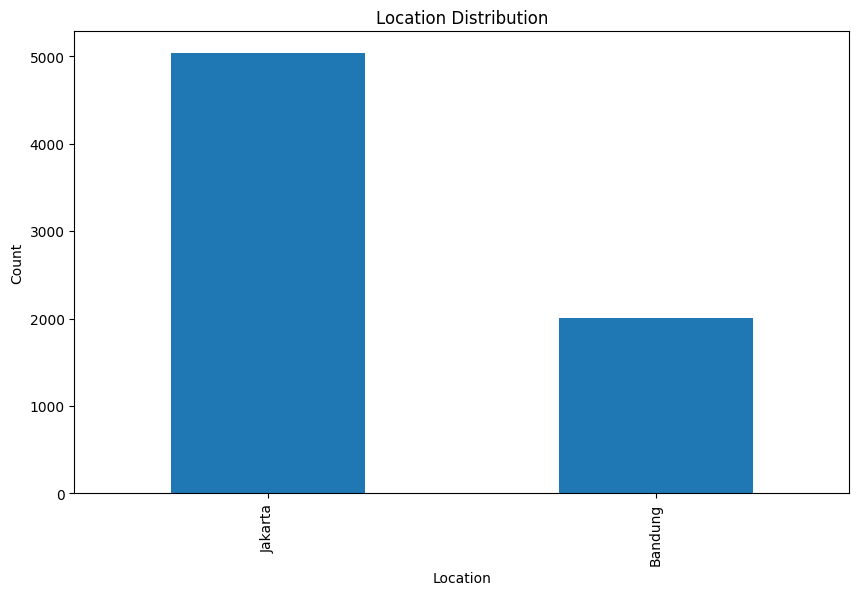

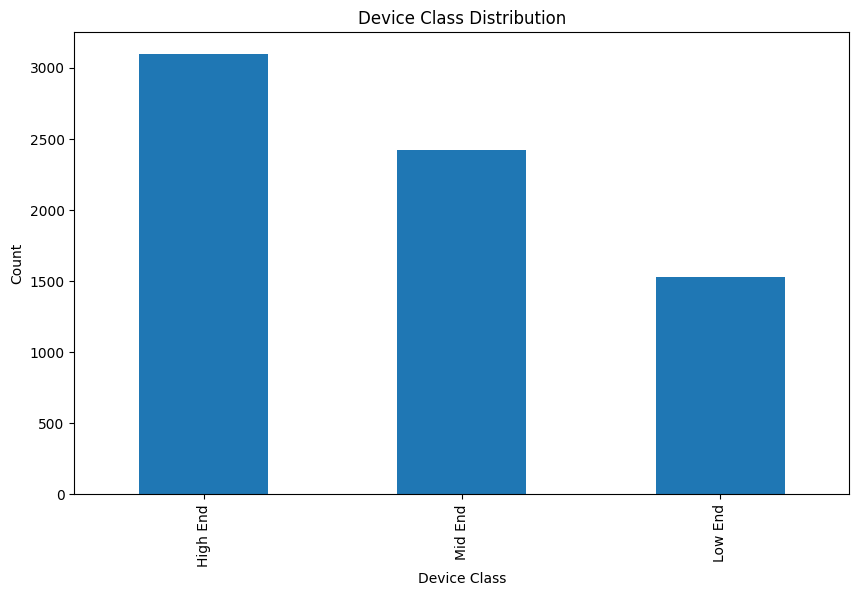

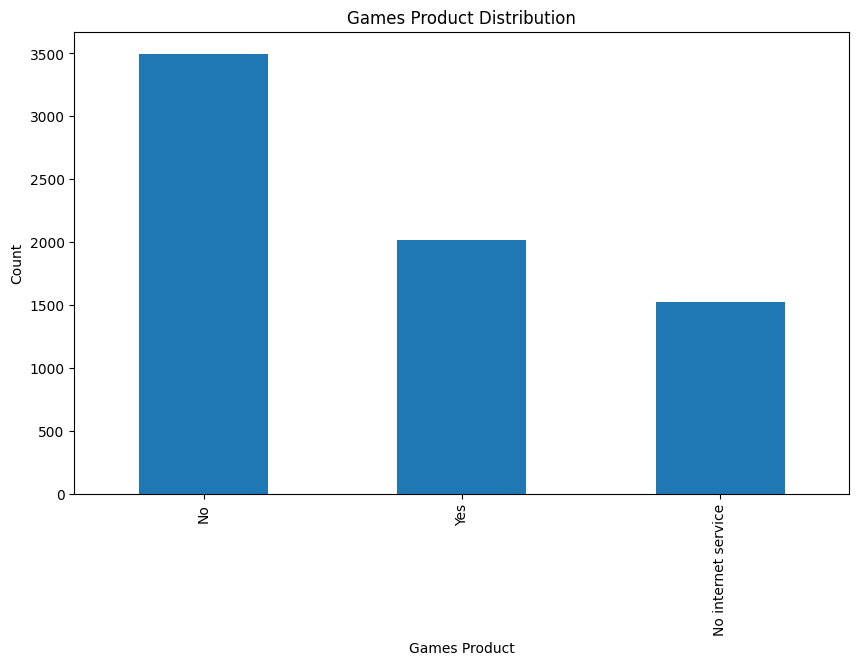

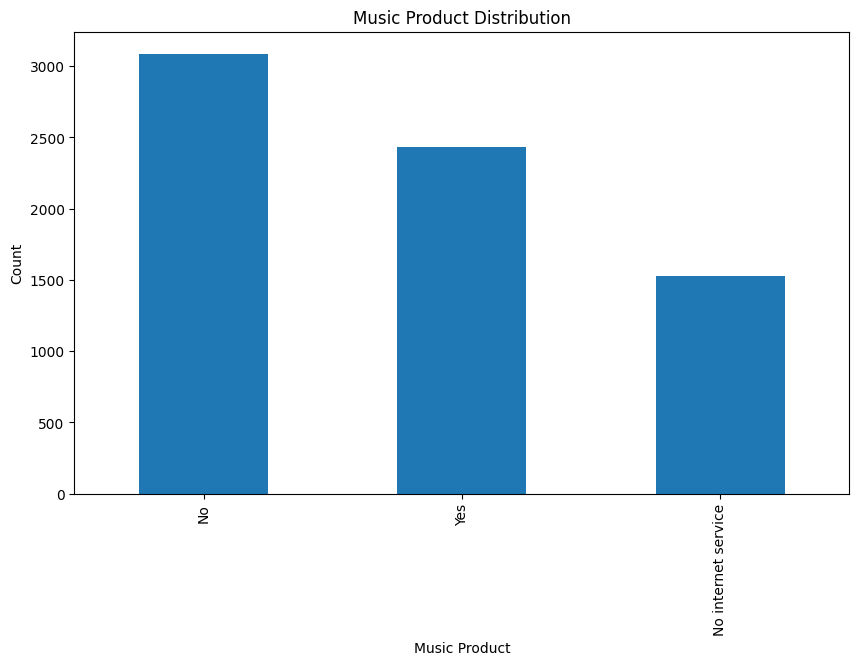

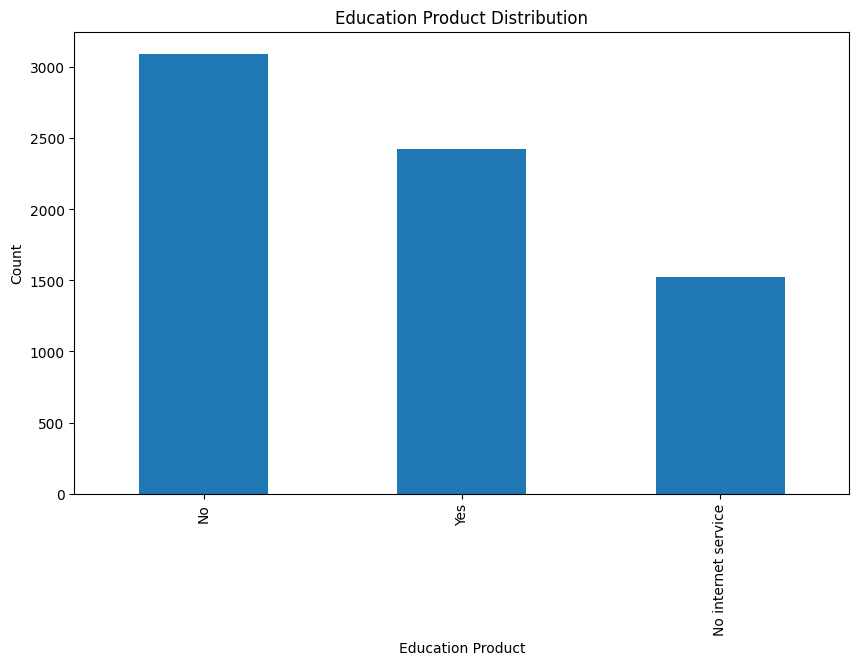

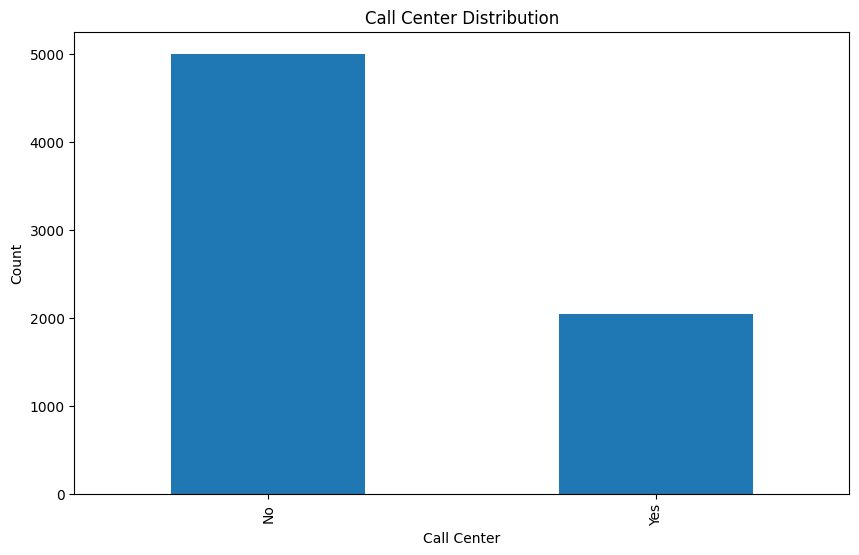

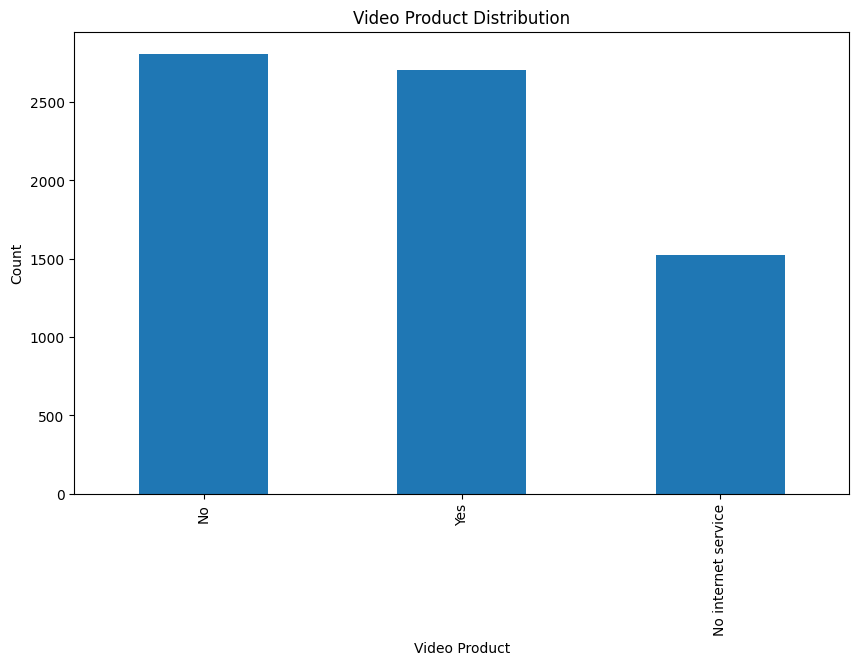

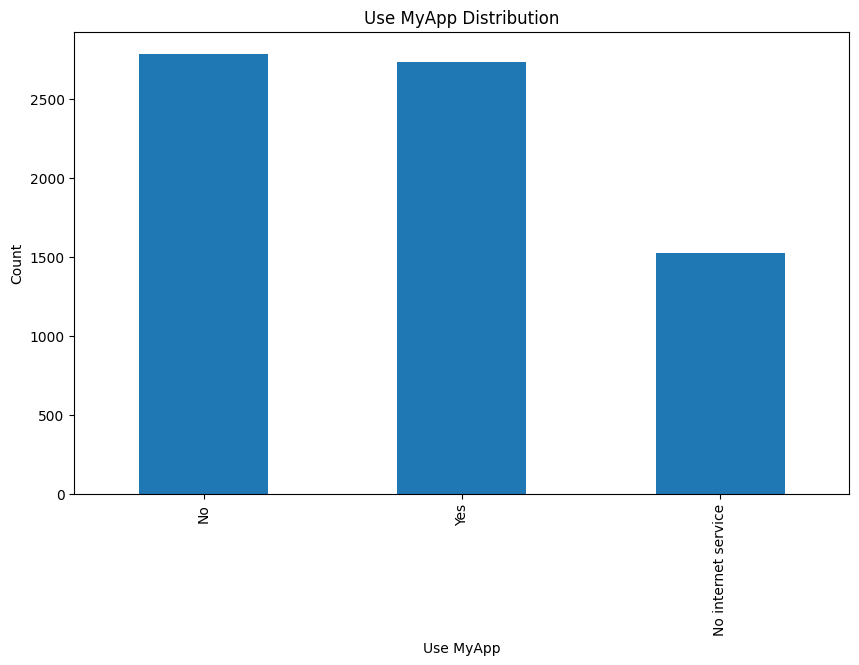

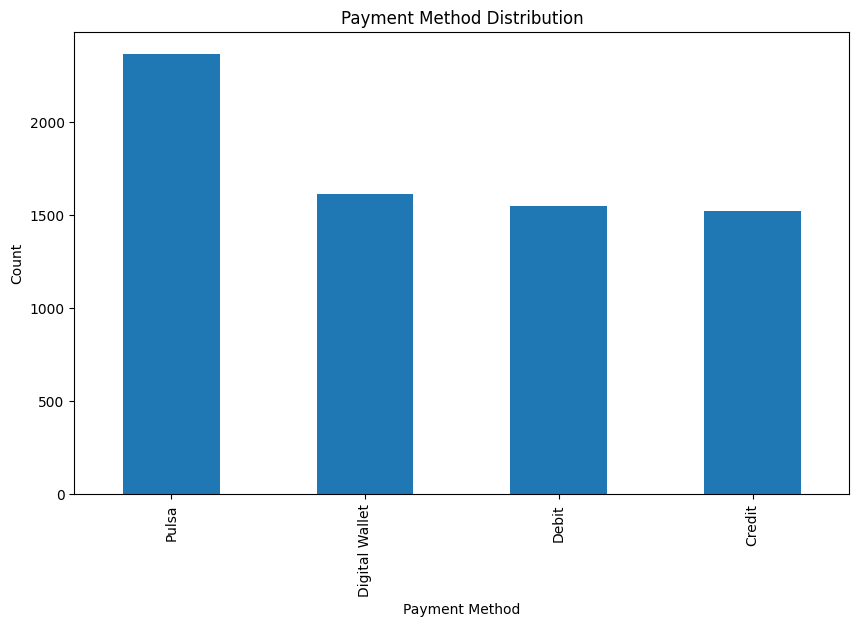

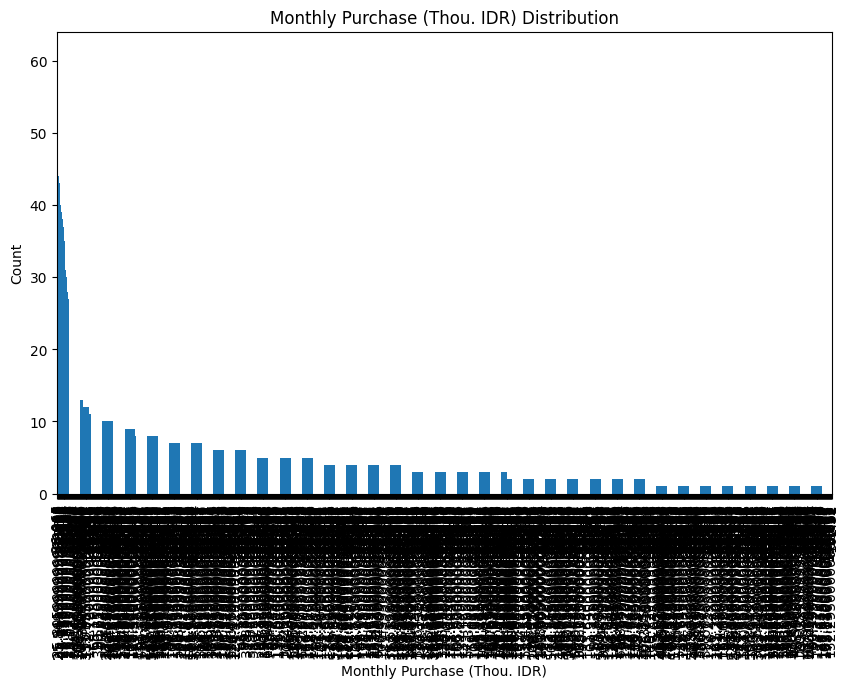

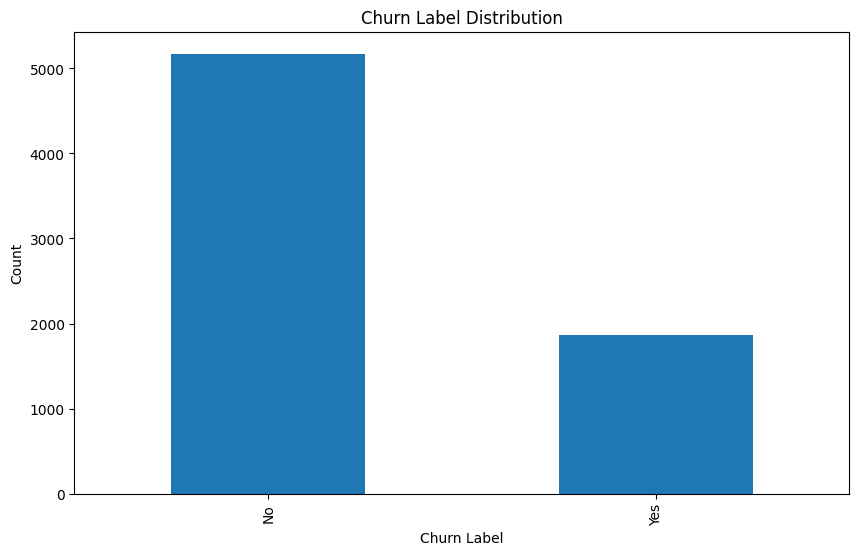

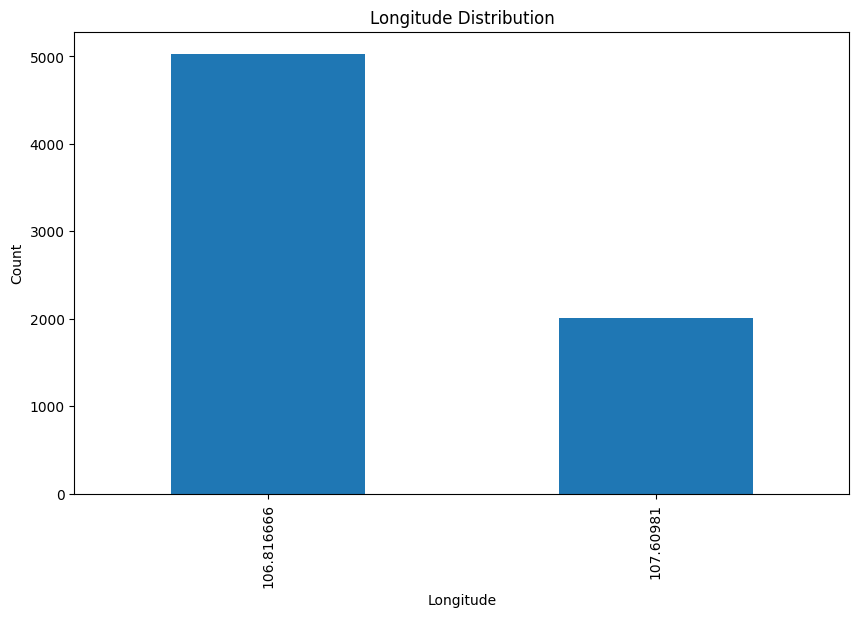

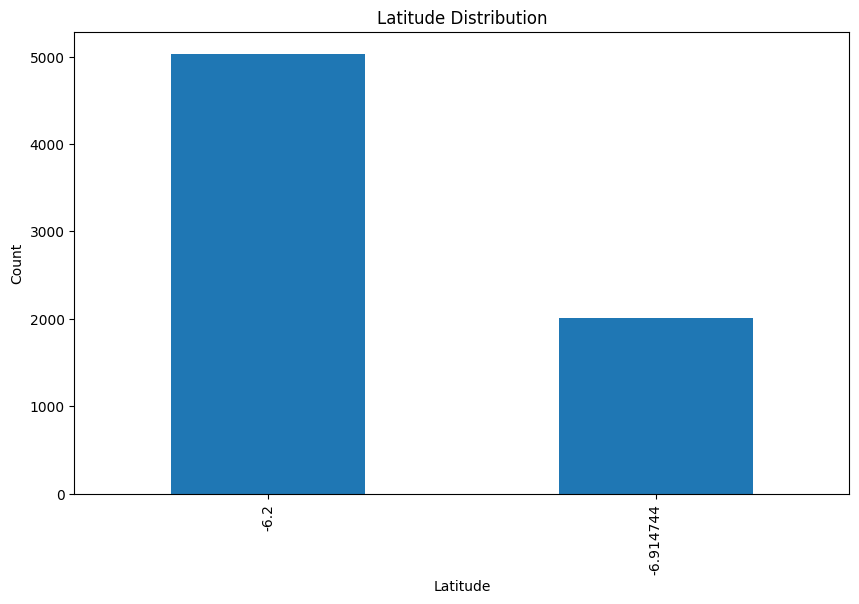

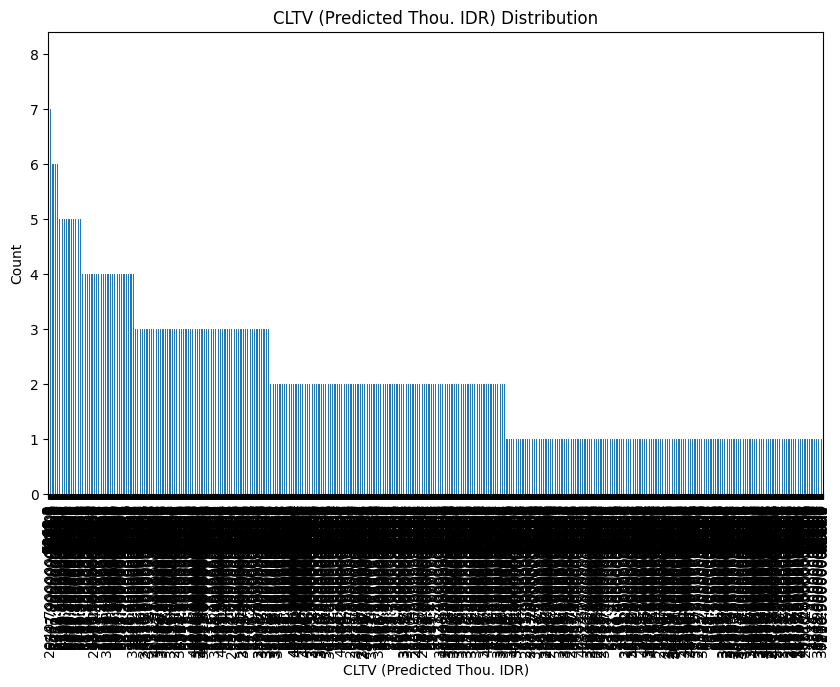

In [16]:
for column in df.columns:
    df[column].value_counts().plot(kind="bar", figsize=(10,6))
    plt.title(f"{column} Distribution")
    plt.ylabel("Count")
    plt.xlabel(column)
    plt.show()

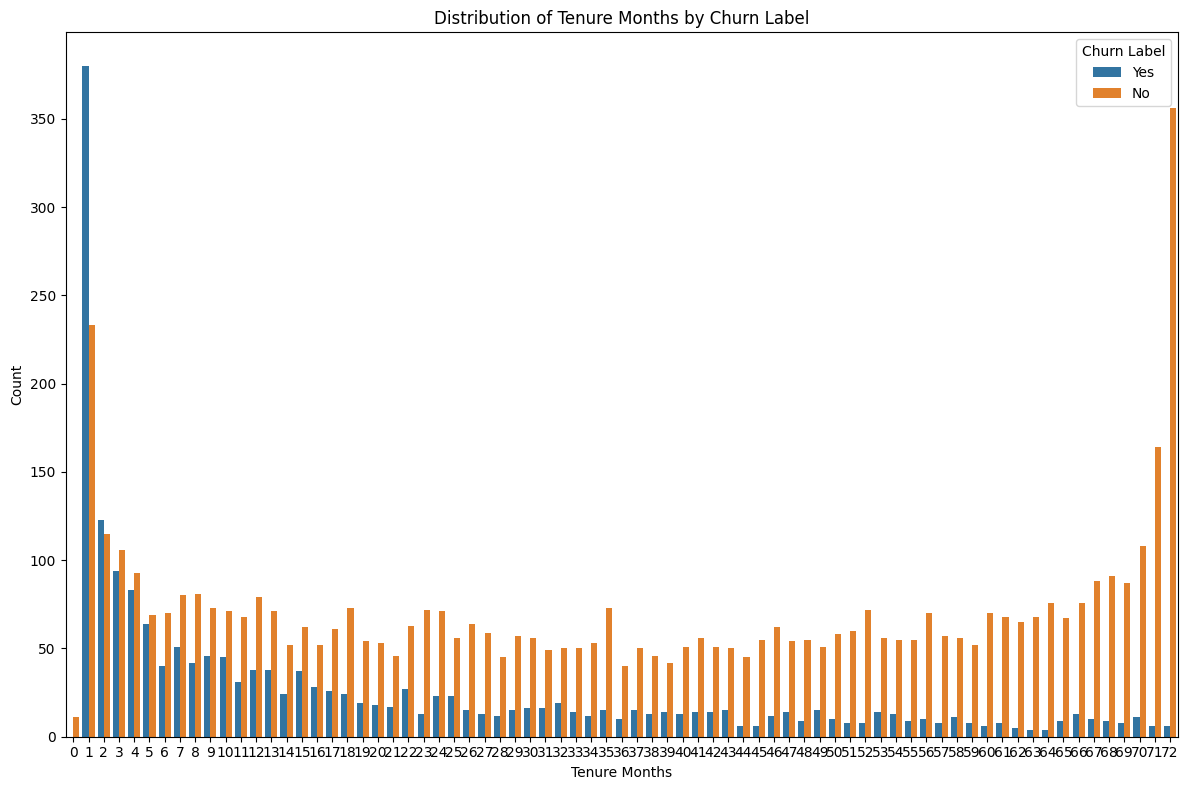

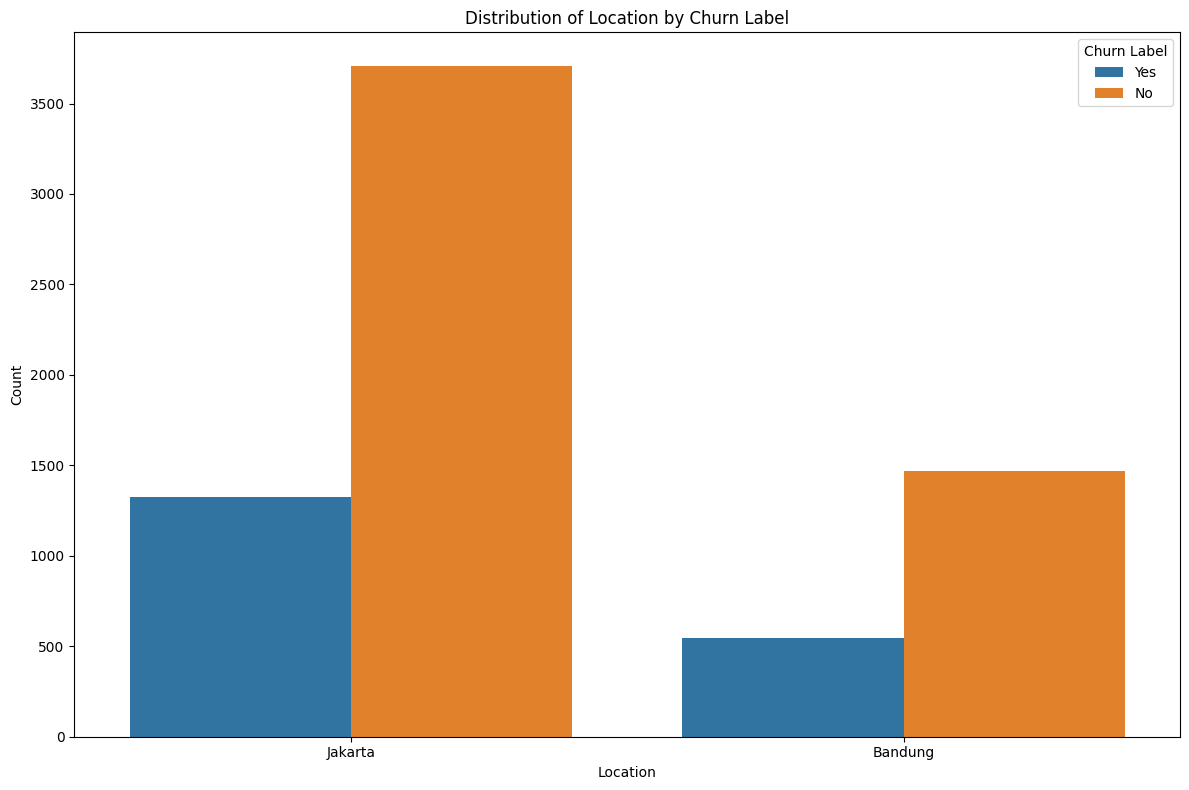

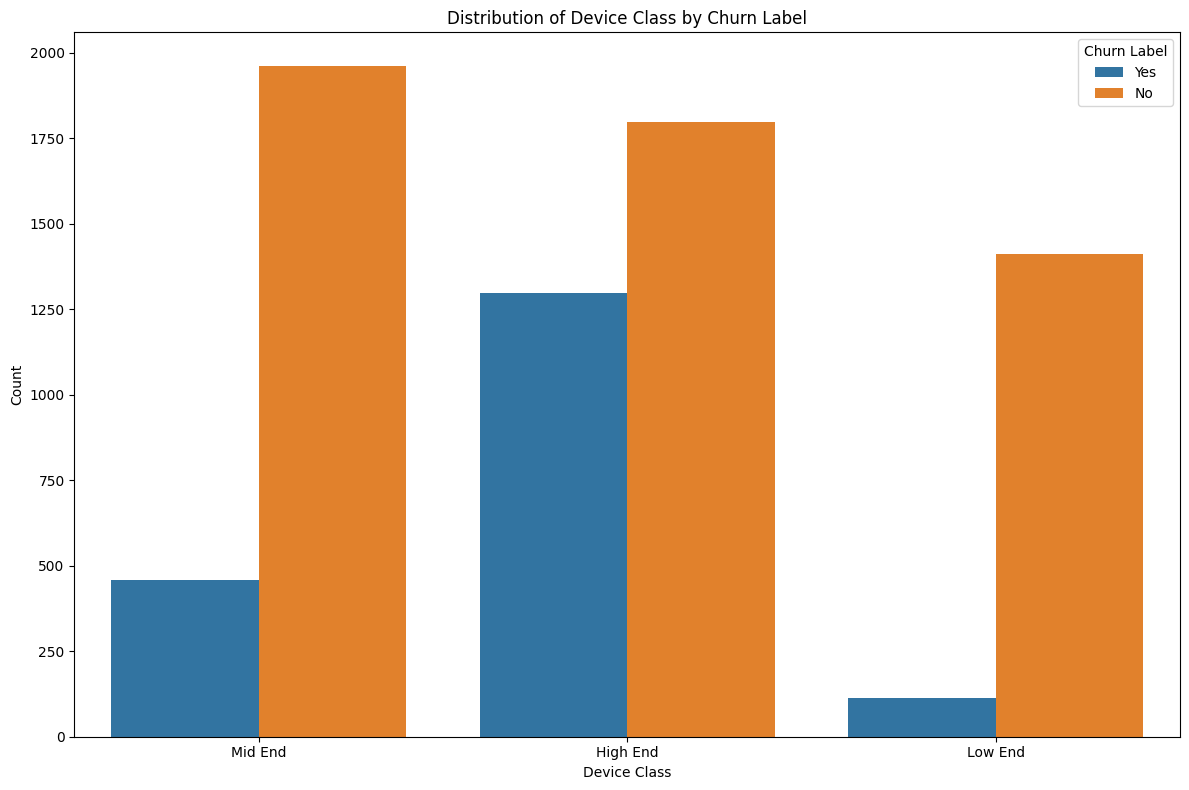

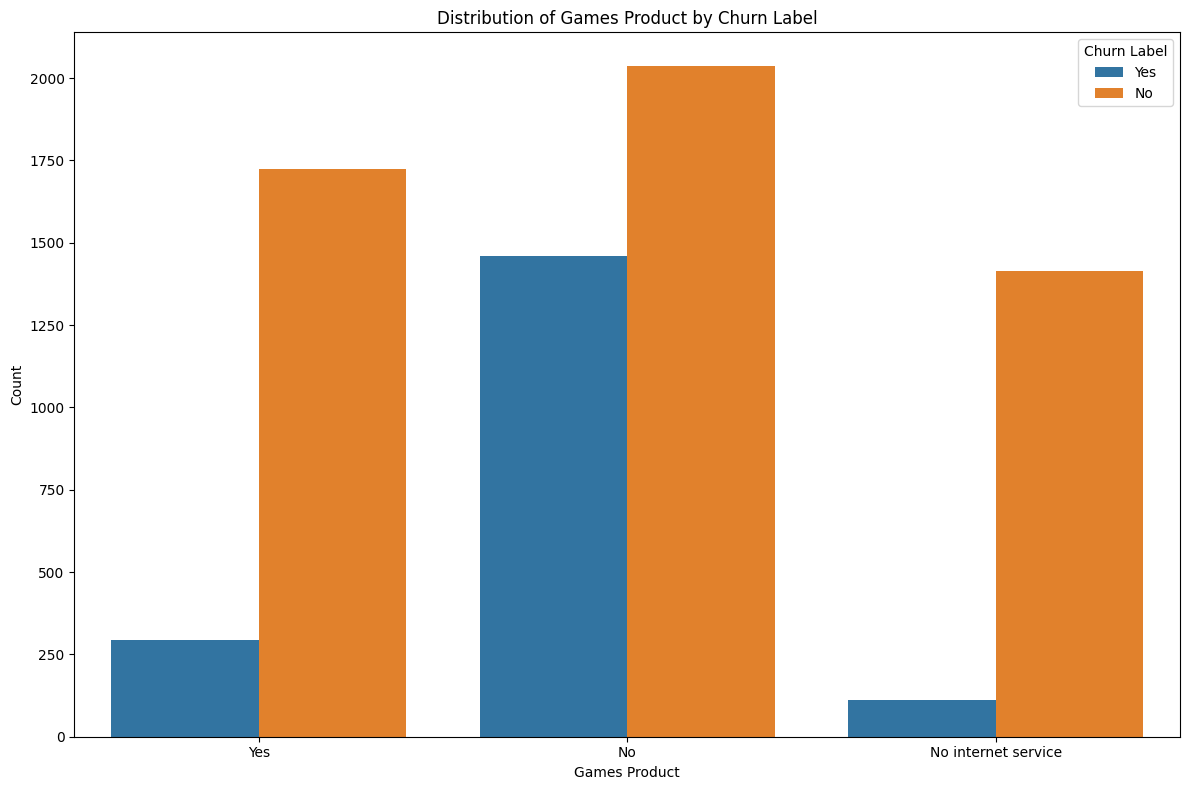

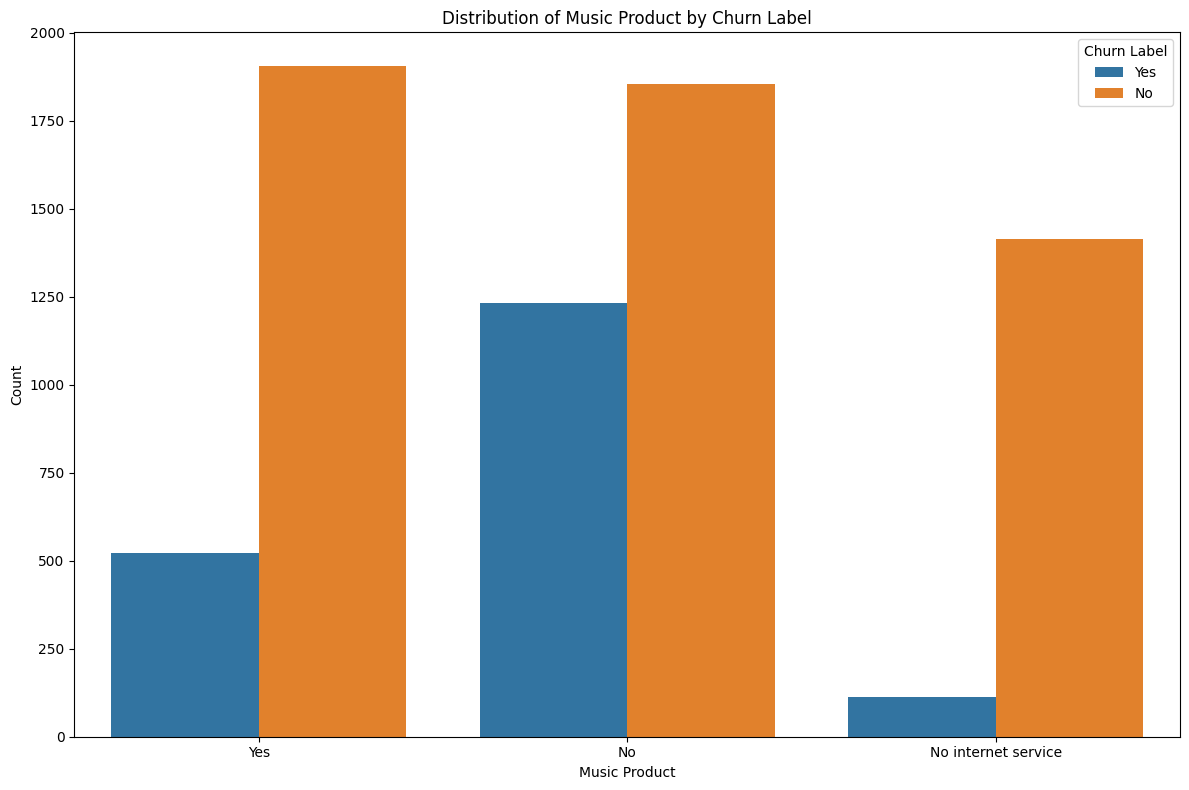

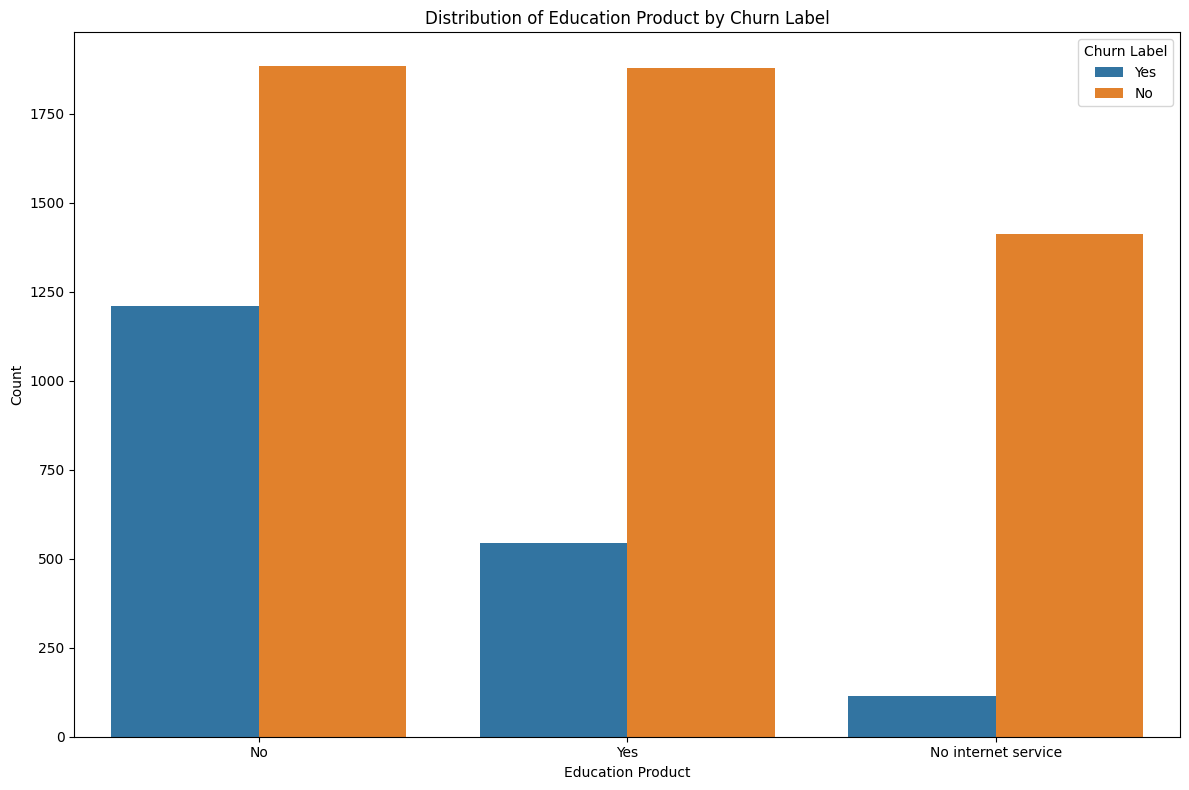

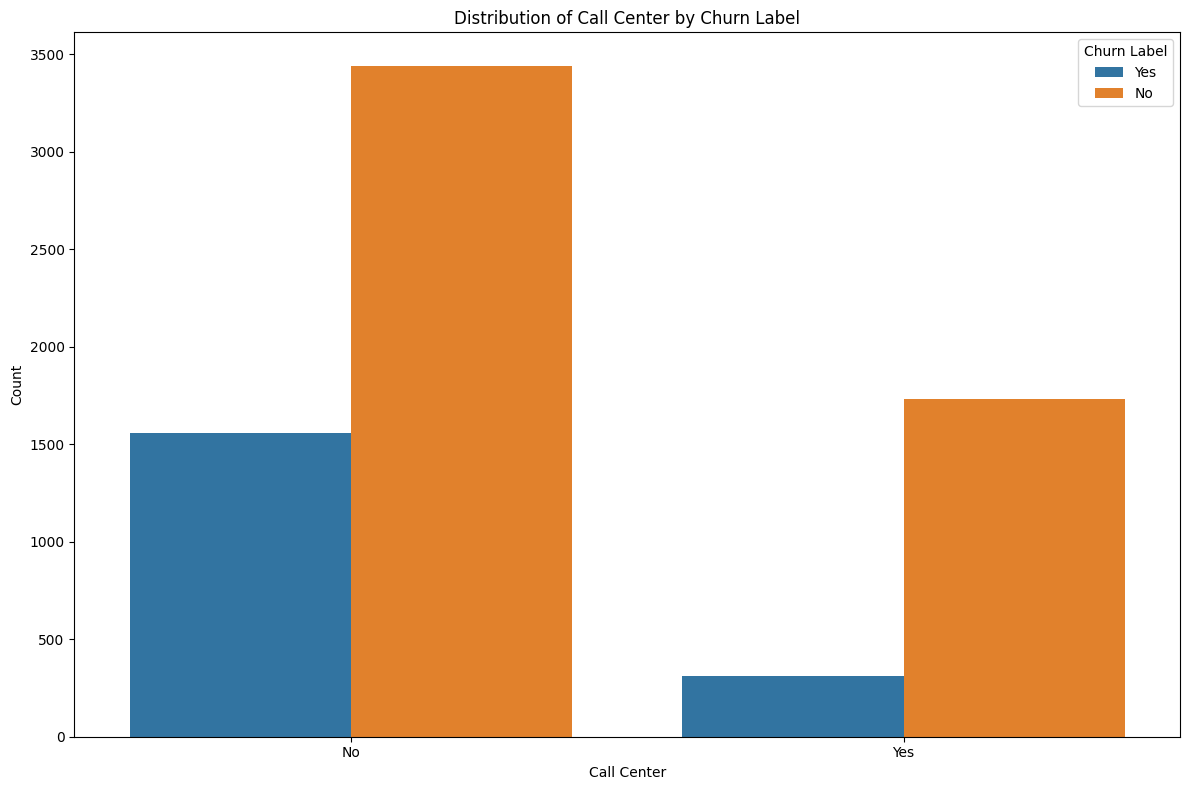

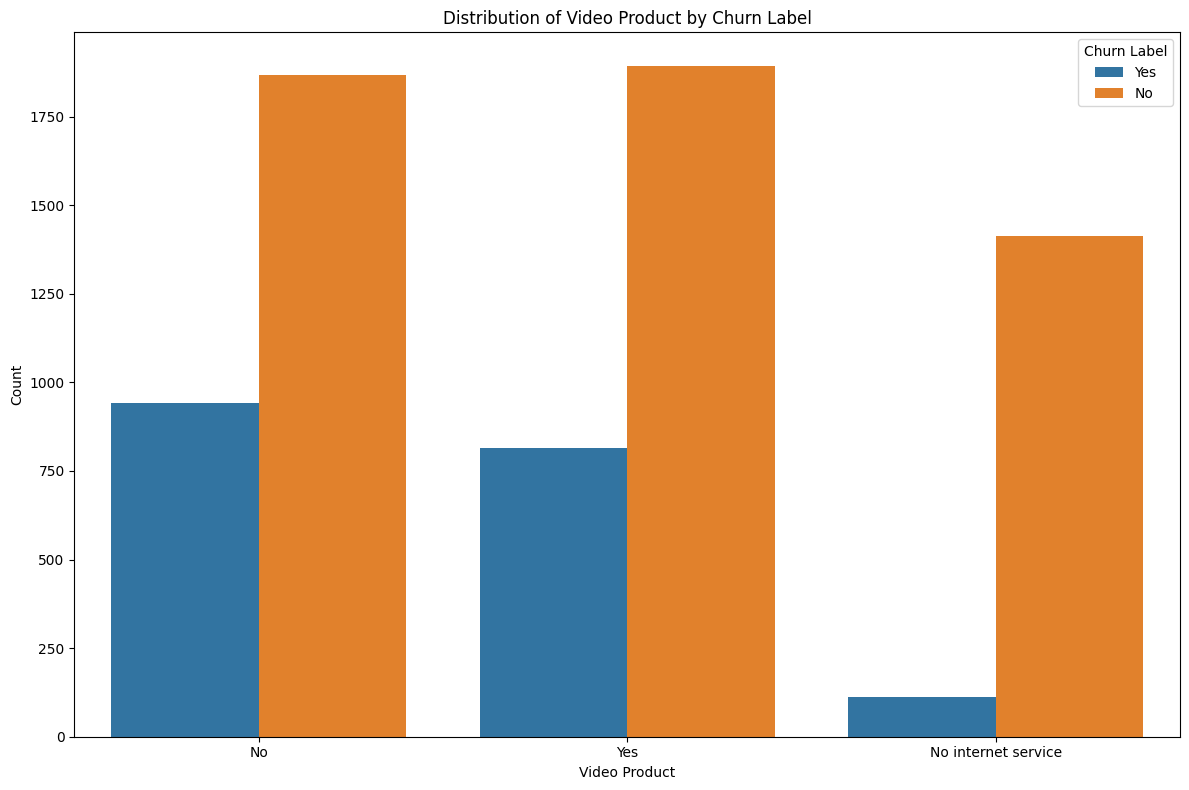

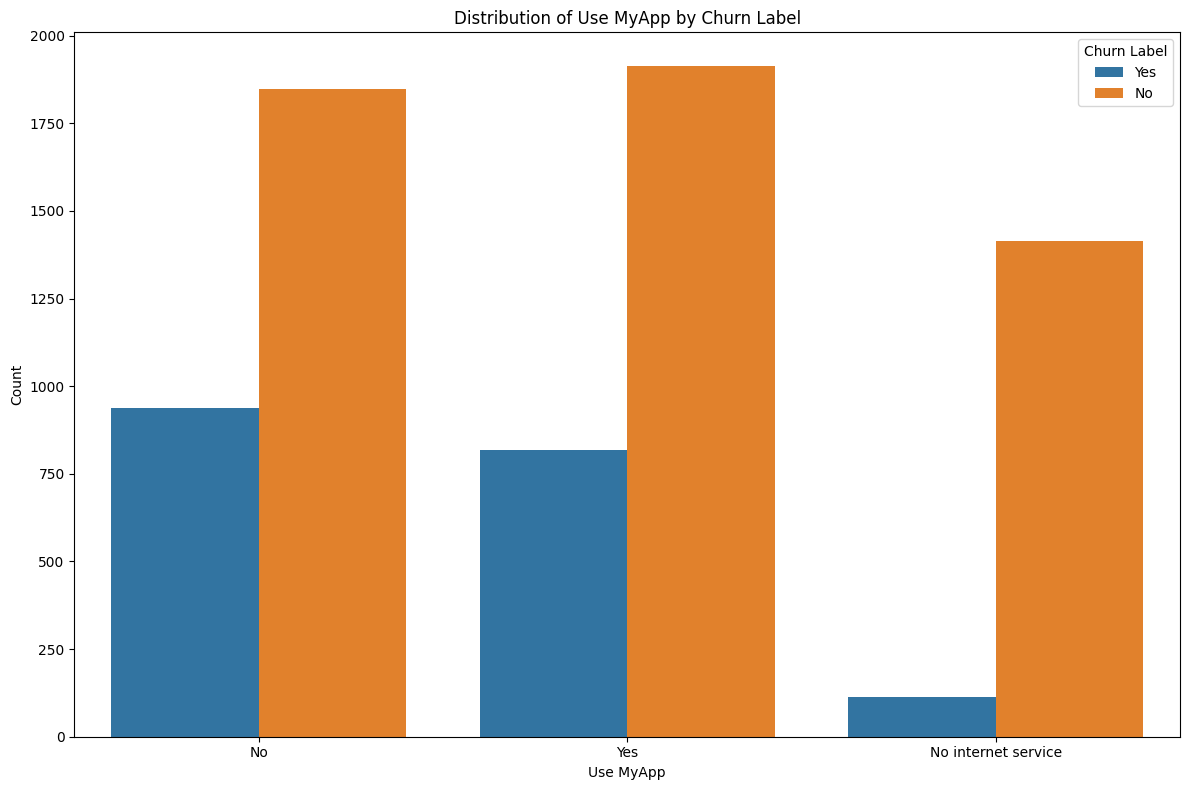

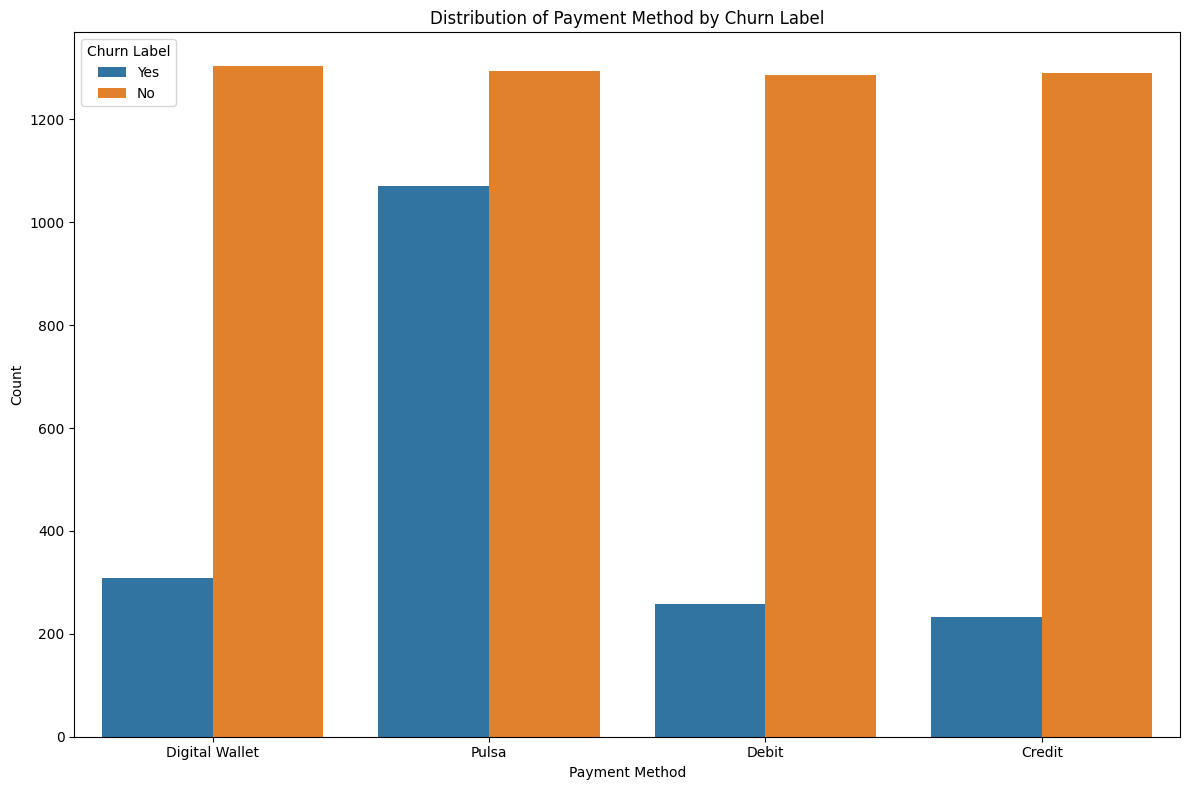

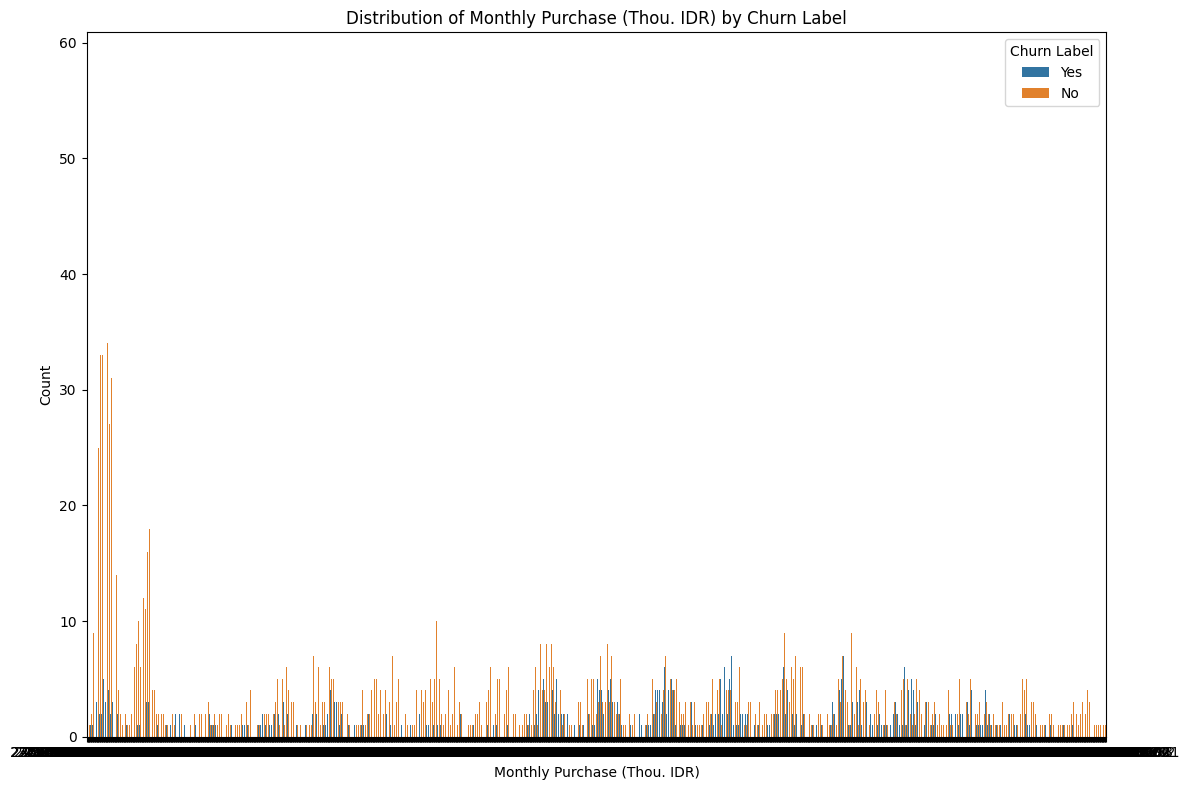

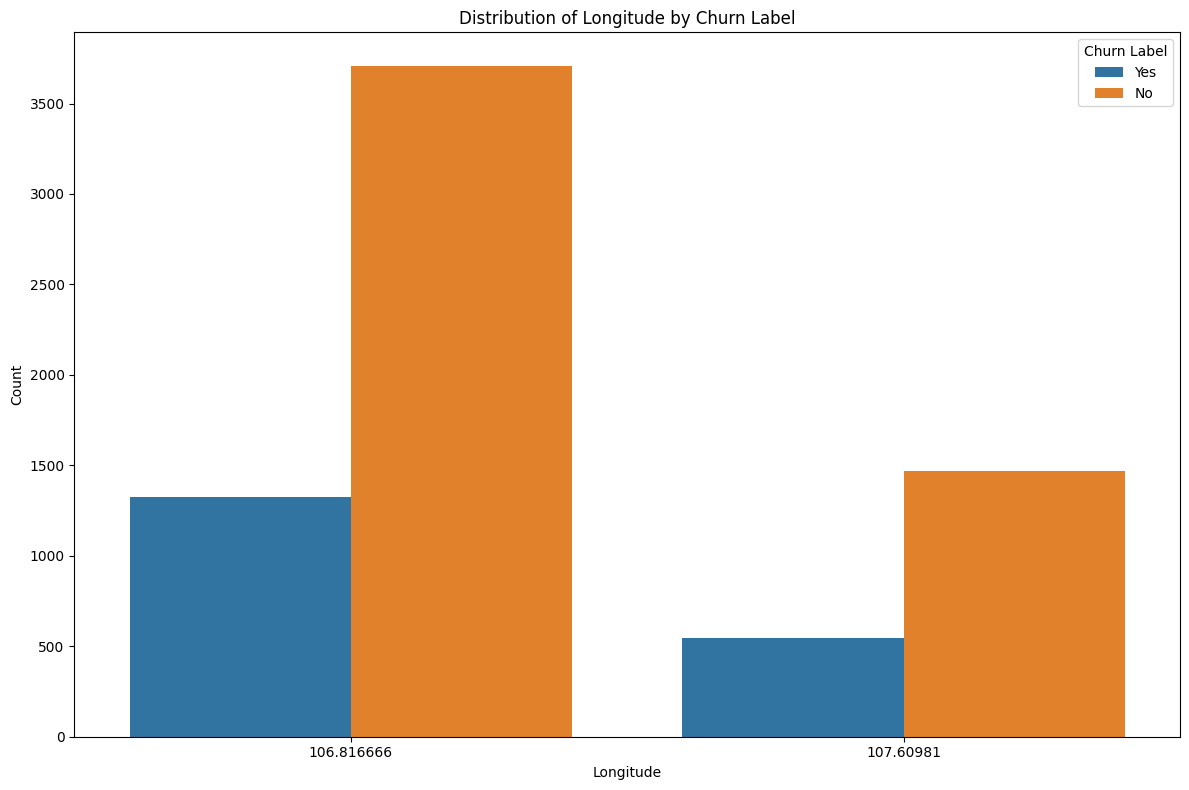

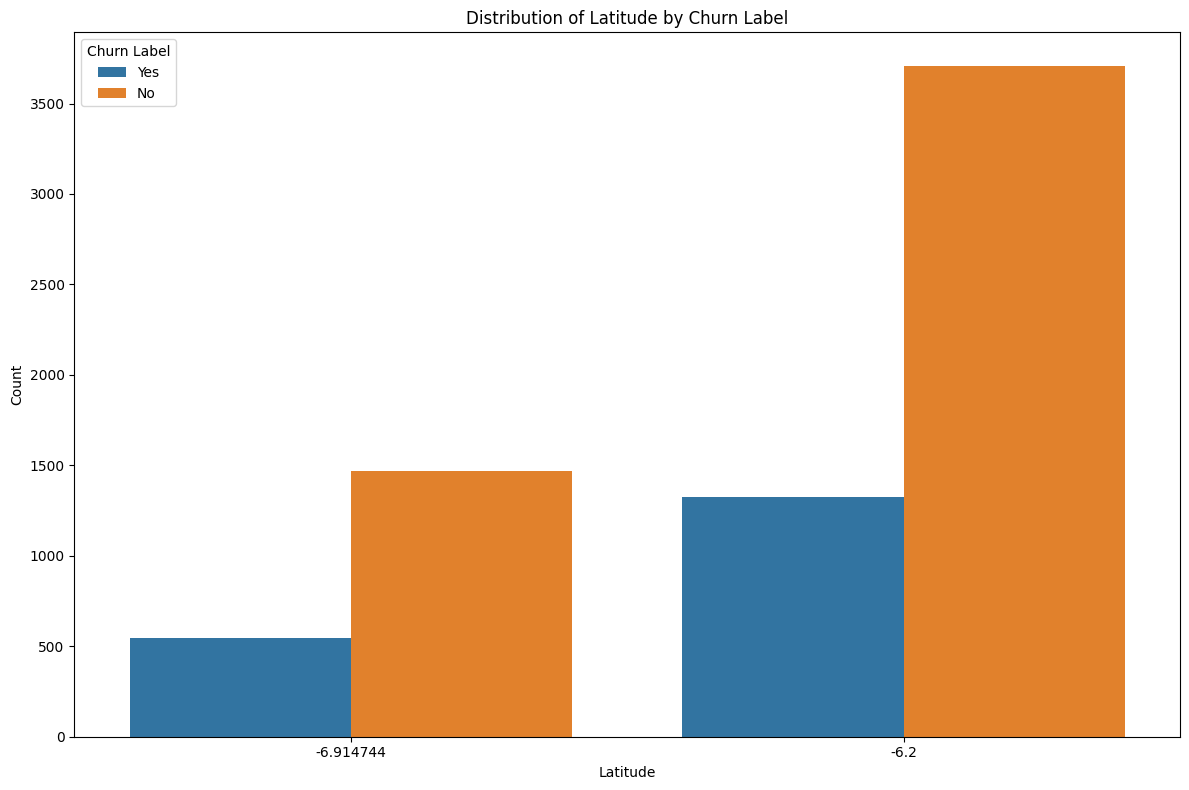

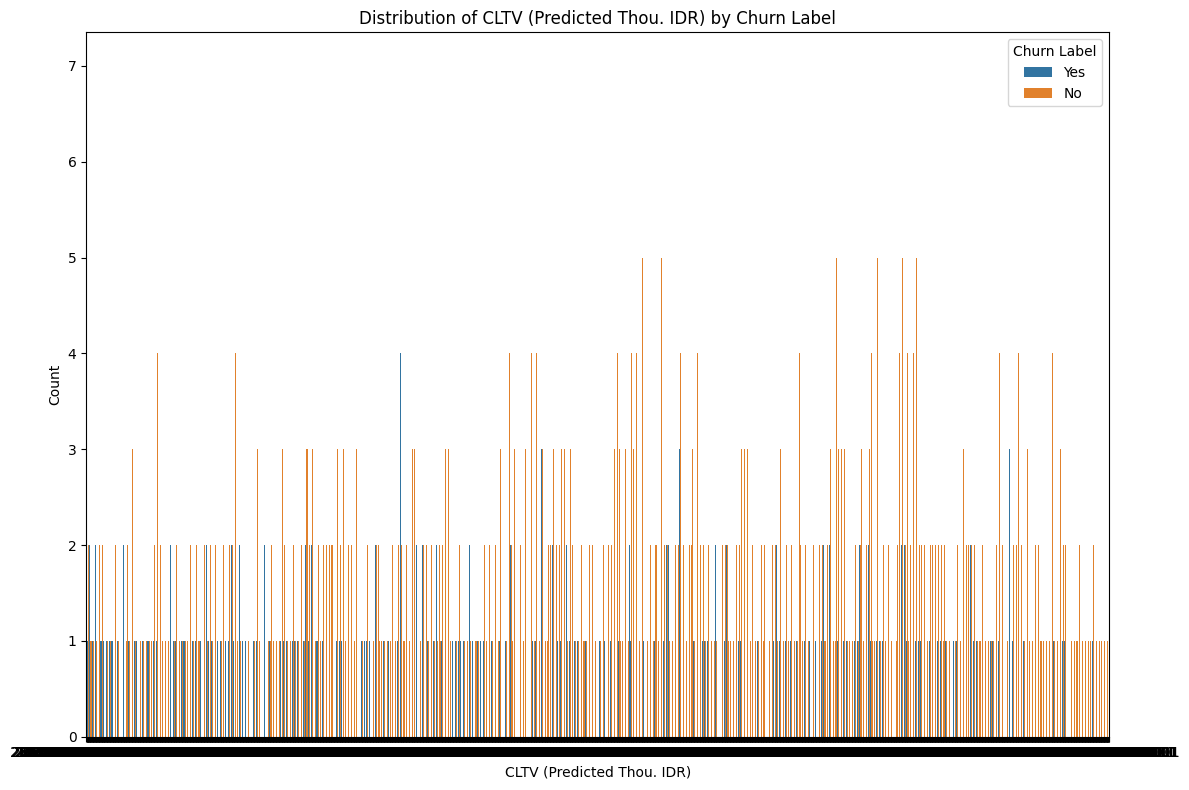

In [17]:
for column in df.columns:
    if column != 'Churn Label':
        plt.figure(figsize=(12, 8))
        sns.countplot(data=df, x=column, hue="Churn Label")
        plt.title(f"Distribution of {column} by Churn Label")
        plt.ylabel("Count")
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

<Axes: xlabel='Churn Label', ylabel='Tenure Months'>

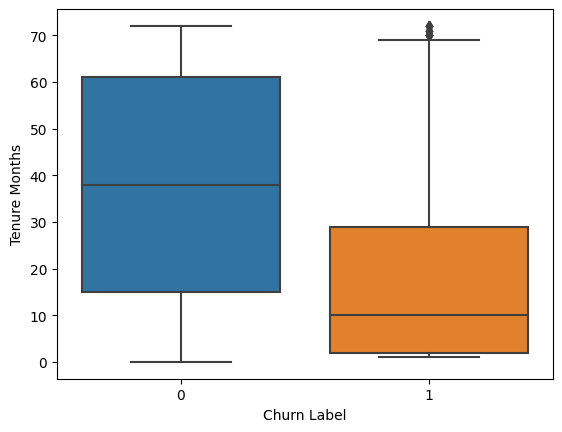

In [18]:
sns.boxplot(data= df, x=y_encoded, y=df["Tenure Months"])

<Axes: xlabel='Churn Label', ylabel='Monthly Purchase (Thou. IDR)'>

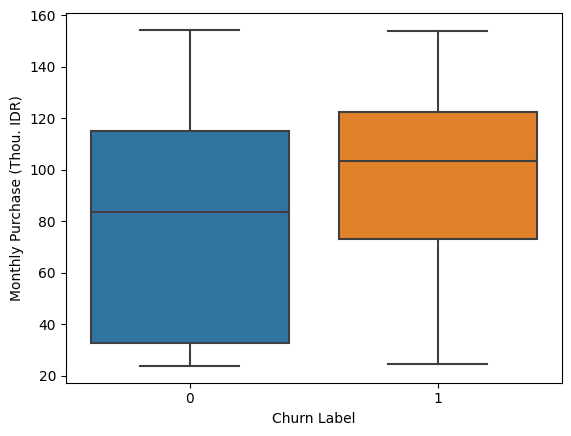

In [19]:
sns.boxplot(data= df, x=y_encoded, y=df["Monthly Purchase (Thou. IDR)"])

<Axes: xlabel='Churn Label', ylabel='Longitude'>

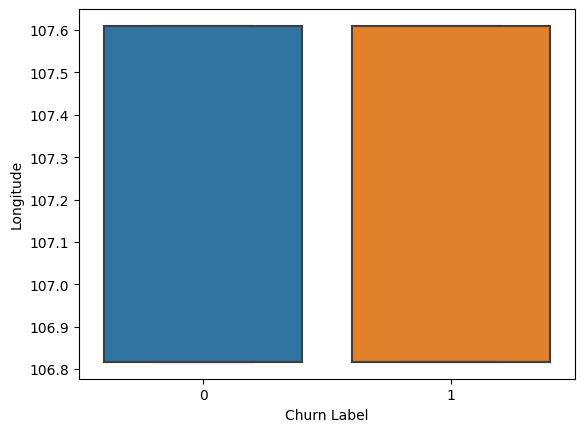

In [20]:
sns.boxplot(data= df, x=y_encoded, y=df["Longitude"])

<Axes: xlabel='Churn Label', ylabel='Latitude'>

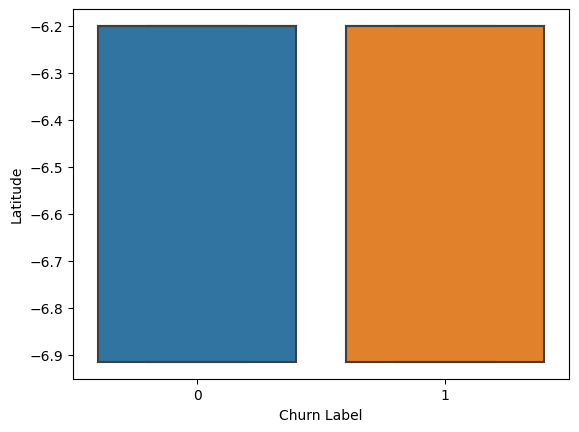

In [21]:
sns.boxplot(data= df, x=y_encoded, y=df["Latitude"])

<Axes: xlabel='Churn Label', ylabel='CLTV (Predicted Thou. IDR)'>

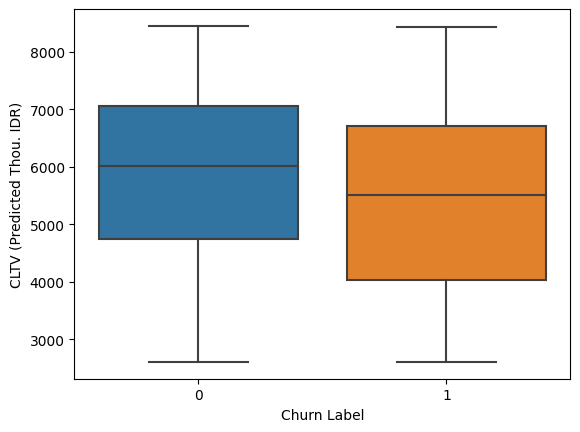

In [22]:
sns.boxplot(data= df, x=y_encoded, y=df["CLTV (Predicted Thou. IDR)"])

# Data Preparation

In [23]:
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


In [24]:
# Split dataset
X = df.drop(columns=['Churn Label'])
y = df['Churn Label']

In [25]:
# Split data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split data training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
print("Jumlah X_train: ", X_train.shape)
print("Jumlah y_train: ", y_train.shape)
print("Jumlah X_val: ", X_val.shape)
print("Jumlah y_val: ", y_val.shape)
print("Jumlah X_test: ", X_test.shape)
print("Jumlah y_test: ", y_test.shape)

Jumlah X_train:  (4507, 14)
Jumlah y_train:  (4507,)
Jumlah X_val:  (1127, 14)
Jumlah y_val:  (1127,)
Jumlah X_test:  (1409, 14)
Jumlah y_test:  (1409,)


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4507 entries, 4806 to 6651
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tenure Months                 4507 non-null   int64  
 1   Location                      4507 non-null   object 
 2   Device Class                  4507 non-null   object 
 3   Games Product                 4507 non-null   object 
 4   Music Product                 4507 non-null   object 
 5   Education Product             4507 non-null   object 
 6   Call Center                   4507 non-null   object 
 7   Video Product                 4507 non-null   object 
 8   Use MyApp                     4507 non-null   object 
 9   Payment Method                4507 non-null   object 
 10  Monthly Purchase (Thou. IDR)  4507 non-null   float64
 11  Longitude                     4507 non-null   float64
 12  Latitude                      4507 non-null   float64
 13  CLTV 

# One Hot Encoding

In [27]:
obj = (X.dtypes == 'object')
object_column_X = list(obj[obj].index)
object_column_X

['Location',
 'Device Class',
 'Games Product',
 'Music Product',
 'Education Product',
 'Call Center',
 'Video Product',
 'Use MyApp',
 'Payment Method']

In [28]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_columns = encoder.fit_transform(X_train[object_column_X])
df_encoded = pd.DataFrame(encoded_columns)
df_encoded.index = X_train.index
X_train_numerical = X_train.drop(object_column_X, axis=1)
X_train_encoded = pd.concat([X_train_numerical, df_encoded], axis=1)
X_train_encoded

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR),0,1,2,3,4,...,16,17,18,19,20,21,22,23,24,25
4806,14,120.770,106.816666,-6.200000,5584.8,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3409,40,102.505,106.816666,-6.200000,6834.1,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3339,17,108.615,106.816666,-6.200000,7233.2,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3541,72,147.745,106.816666,-6.200000,8409.7,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4009,6,82.420,106.816666,-6.200000,5081.7,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,28,137.410,106.816666,-6.200000,3203.2,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1409,1,66.040,106.816666,-6.200000,5895.5,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6834,52,46.085,106.816666,-6.200000,7161.7,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5685,12,59.670,107.609810,-6.914744,7527.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
encoded_columns = encoder.fit_transform(X_val[object_column_X])
df_encoded = pd.DataFrame(encoded_columns)
df_encoded.index = X_val.index
X_val_numerical = X_val.drop(object_column_X, axis=1)
X_val_encoded = pd.concat([X_val_numerical, df_encoded], axis=1)
X_val_encoded

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR),0,1,2,3,4,...,16,17,18,19,20,21,22,23,24,25
3575,71,130.650,106.816666,-6.200000,5304.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4958,69,95.810,107.609810,-6.914744,5548.4,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1447,15,103.220,106.816666,-6.200000,4707.3,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3334,14,25.935,106.816666,-6.200000,7501.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4041,53,127.075,106.816666,-6.200000,5834.4,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,58,24.895,107.609810,-6.914744,8240.7,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4416,70,136.240,106.816666,-6.200000,6878.3,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2451,11,26.585,106.816666,-6.200000,3434.6,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3201,7,50.115,106.816666,-6.200000,4348.5,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
encoded_columns = encoder.fit_transform(X_test[object_column_X])
df_encoded = pd.DataFrame(encoded_columns)
df_encoded.index = X_test.index
X_test_numerical = X_test.drop(object_column_X, axis=1)
X_test_encoded = pd.concat([X_test_numerical, df_encoded], axis=1)
X_test_encoded

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR),0,1,2,3,4,...,16,17,18,19,20,21,22,23,24,25
185,15,111.670,106.816666,-6.200000,4652.7,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2715,18,73.840,106.816666,-6.200000,7225.4,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3825,2,26.000,107.609810,-6.914744,2908.1,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1807,6,109.460,107.609810,-6.914744,7584.2,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
132,40,136.240,106.816666,-6.200000,4539.6,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,66,136.370,106.816666,-6.200000,6359.6,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
315,19,111.800,106.816666,-6.200000,6314.1,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2439,2,117.455,106.816666,-6.200000,6969.3,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5002,68,143.260,107.609810,-6.914744,5340.4,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Standardization

In [31]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4507 entries, 4806 to 6651
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tenure Months                 4507 non-null   int64  
 1   Monthly Purchase (Thou. IDR)  4507 non-null   float64
 2   Longitude                     4507 non-null   float64
 3   Latitude                      4507 non-null   float64
 4   CLTV (Predicted Thou. IDR)    4507 non-null   float64
 5   0                             4507 non-null   float64
 6   1                             4507 non-null   float64
 7   2                             4507 non-null   float64
 8   3                             4507 non-null   float64
 9   4                             4507 non-null   float64
 10  5                             4507 non-null   float64
 11  6                             4507 non-null   float64
 12  7                             4507 non-null   float64
 13  8    

In [32]:
numerical_features = ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)']

In [33]:
scaler = StandardScaler()
scaler.fit(X_train_encoded[numerical_features])
X_train_encoded[numerical_features] = scaler.transform(X_train_encoded.loc[:, numerical_features])
X_train_encoded[numerical_features].describe().round(4)

,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
count,4507.0000,4507.0000,4507.0000,4507.0000,4507.0000
mean,-0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001
min,-1.3165,-1.5261,-0.6250,-1.6000,-2.0246
25%,-0.9491,-0.9876,-0.6250,-1.6000,-0.7897
50%,-0.1329,0.1946,-0.6250,0.6250,0.1083
75%,0.9283,0.8434,1.6000,0.6250,0.8261
max,1.6222,1.7991,1.6000,0.6250,1.7637


In [34]:
scaler.fit(X_val[numerical_features])
X_val_encoded[numerical_features] = scaler.transform(X_val_encoded.loc[:, numerical_features])
X_val_encoded[numerical_features].describe().round(4)

,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
count,1127.0000,1127.0000,1127.0000,1127.0000,1127.0000
mean,0.0000,0.0000,0.0000,0.0000,0.0000
std,1.0004,1.0004,1.0004,1.0004,1.0004
min,-1.3403,-1.5211,-0.6531,-1.5311,-2.0170
25%,-0.9764,-0.9573,-0.6531,-1.5311,-0.7963
50%,-0.1274,0.1742,-0.6531,0.6531,0.1003
75%,0.9238,0.8389,1.5311,0.6531,0.8357
max,1.5707,1.7465,1.5311,0.6531,1.7504


In [35]:
scaler.fit(X_test[numerical_features])
X_test_encoded[numerical_features] = scaler.transform(X_test_encoded.loc[:, numerical_features])
X_test_encoded[numerical_features].describe().round(4)

,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
count,1409.0000,1409.0000,1409.0000,1409.0000,1409.0000
mean,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
std,1.0004,1.0004,1.0004,1.0004,1.0004
min,-1.2658,-1.5982,-0.6395,-1.5636,-2.0370
25%,-0.9404,-0.7619,-0.6395,-1.5636,-0.7741
50%,-0.1675,0.1690,-0.6395,0.6395,0.0985
75%,0.9307,0.8060,1.5636,0.6395,0.8063
max,1.6221,1.7791,1.5636,0.6395,1.8145


# Resampling

In [36]:
X_train_encoded

,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR),0,1,2,3,4,...,16,17,18,19,20,21,22,23,24,25
4806,-0.745075,0.946231,-0.624996,0.624996,-0.092991,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3409,0.316102,0.479980,-0.624996,0.624996,0.716559,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3339,-0.622632,0.635950,-0.624996,0.624996,0.975178,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3541,1.622167,1.634823,-0.624996,0.624996,1.737553,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4009,-1.071592,-0.032730,-0.624996,0.624996,-0.419001,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,-0.173672,1.371001,-0.624996,0.624996,-1.636276,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1409,-1.275664,-0.450863,-0.624996,0.624996,0.108344,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6834,0.805876,-0.960254,-0.624996,0.624996,0.928845,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5685,-0.826705,-0.613470,1.600010,-1.600010,1.165561,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
class_counts = y_train.value_counts()
print(class_counts)

Churn Label
No     3320
Yes    1187
Name: count, dtype: int64


In [38]:
# Calculate current ratio of minority to majority class
current_ratio = class_counts.min() / class_counts.max()
print(f"Current ratio: {current_ratio}")

Current ratio: 0.3575301204819277


In [39]:
if current_ratio < 0.1:
    smote_strategy = 0.1
else:
    smote_strategy = current_ratio + 0.1

In [40]:
smote_strategy

0.45753012048192776

In [41]:
X_train_encoded.columns = X_train_encoded.columns.astype(str)
X_val_encoded.columns = X_val_encoded.columns.astype(str)
X_test_encoded.columns = X_test_encoded.columns.astype(str)

# Kelas minoritas akan ditingkatkan sesuai variabel `smote strategy` dari total dataset
smote = SMOTE(sampling_strategy=smote_strategy)
# Kelas majoritas akan ditingkatkan 50% dari total dataset
random_under_sampling = RandomUnderSampler(sampling_strategy=0.5)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)
X_train_resampled, y_train_resampled = random_under_sampling.fit_resample(X_train_resampled, y_train_resampled)

# Modeling